<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Airbnb-Regression-Case-Study" data-toc-modified-id="Airbnb-Regression-Case-Study-1">Airbnb Regression Case Study</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2">Learning Outcomes</a></span></li><li><span><a href="#Stacked-Models-(a-type-of-ensembling)" data-toc-modified-id="Stacked-Models-(a-type-of-ensembling)-3">Stacked Models (a type of ensembling)</a></span></li><li><span><a href="#Custom-Metric-Definition" data-toc-modified-id="Custom-Metric-Definition-4">Custom Metric Definition</a></span></li><li><span><a href="#Custom-Metric-Definition" data-toc-modified-id="Custom-Metric-Definition-5">Custom Metric Definition</a></span></li><li><span><a href="#Custom-Regression-Loss-Function" data-toc-modified-id="Custom-Regression-Loss-Function-6">Custom Regression Loss Function</a></span></li><li><span><a href="#Lower-&amp;-Upper-Bound-Calculation" data-toc-modified-id="Lower-&amp;-Upper-Bound-Calculation-7">Lower &amp; Upper Bound Calculation</a></span></li><li><span><a href="#Customized-Loss-Function-for-Regression" data-toc-modified-id="Customized-Loss-Function-for-Regression-8">Customized Loss Function for Regression</a></span></li><li><span><a href="#3-types-of-evaluation-for-ML-models" data-toc-modified-id="3-types-of-evaluation-for-ML-models-9">3 types of evaluation for ML models</a></span></li><li><span><a href="#Test-dataset-evaluation-on-unseen-data." data-toc-modified-id="Test-dataset-evaluation-on-unseen-data.-10">Test dataset evaluation on unseen data.</a></span></li><li><span><a href="#Spot-Checking-Price-Suggestions" data-toc-modified-id="Spot-Checking-Price-Suggestions-11">Spot Checking Price Suggestions</a></span></li><li><span><a href="#A/B-testing-in-production-on-user-data" data-toc-modified-id="A/B-testing-in-production-on-user-data-12">A/B testing in production on user data</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-13">Takeaways</a></span></li><li><span><a href="#References" data-toc-modified-id="References-14">References</a></span></li></ul></div>

<center><h2>Airbnb Regression Case Study</h2></center>

<center><img src="images/maxresdefault.jpg" width="100%/></center>

<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Explain how machine learning can help airbnb.
- Explain how to create custom metrics and loss functions aligned with airbnb.
- List the 3 best ways to evaluation model performance in the context of a business.

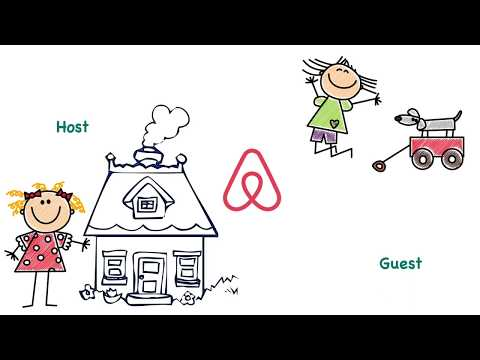

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("dHnFfQ7btfQ")

<center><h2>Stacked Models (a type of ensembling)</h2></center>

1. Binary classification - probability of booking or not
2. Regression - predict optimal price in dollars
3. Personalization logic - ad hoc business rules

<center><h2>Custom Metric Definition</h2></center>


<center><img src="images/t.png" width="75%"/></center>

Threshold regression to create classification.

P<sub>sug</sub> is the suggested price from regression model.  
<br>
P is the actual price.

<center><h2>Custom Metric Definition</h2></center>
<center><img src="images/m.png" width="75%"/></center>
<center><img src="images/r.png" width="75%"/></center>

$BR = median( 14\% (\$15), 6\% (\$5), 5\% (\$10), 0, 0) = 5%$

<center><h2>Custom Regression Loss Function</h2></center>

<center><img src="images/reg.png" width="100%"/></center>

$f_θ(x_i)$ given input parameter, suggest price.  
$L$ is a lower bound function for the optimal price range.  
$U$ is an upper bound function.  
$P_i$ is the calendar price

<center><h2>Lower & Upper Bound Calculation</h2></center>

<center><img src="images/l.png" width="75%"/></center>

For booked listing nights, the lower bound is the booking price $P_i$, and for non-booked listing nights it is $c_1$ $P_i$ where $c_1$ is a constant between 0 and 1.


<center><img src="images/u.png" width="75%"/></center>

For non-booked listing nights, the upper bound is the calendar price $P_i$ at which the sample was not booked. For a booked night, the upper bound is $c_2$ $P_i$ where $c_2$ is a constant > 1.

<center><h2>Customized Loss Function for Regression</h2></center>

<center><img src="images/o.png" width="75%"/></center>

If the price is between the upper and lower bound, the loss is zero. Otherwise the loss is the distance between the suggestion and the bound.

Evaluation

<center><h2>3 types of evaluation for ML models</h2></center>

1. Test dataset evaluation on unseen data.
1. Subjective human judgment.
1. A/B testing in production on user data.

<center><h2>Test dataset evaluation on unseen data.</h2></center>

<center><img src="images/t2.png" width="75%"/></center>

<center><h2>Spot Checking Price Suggestions</h2></center>

> In addition to the quantitive [sic] evaluation, we also did qualitative evaluation to check if our price suggestions are responsive to demand change. In particular, we sampled the final price suggestions generated on 2018-02-08 for future 120 nights. 

<center><img src="images/results.png" width="50%"/></center>

<center><h2>A/B testing in production on user data</h2></center>

> The proposed strategy model has been deployed in production for more than 1 year at Airbnb. The launch of the first iteration of the strategy model yielded significant gains on bookings and booking values for hosts who have adopted our suggestions. The proposed set of offline metrics were also greatly improved over the previous production model. Multiple iterations of the strategy model have been experimented and launched into the production to futher improve the quality of our price suggestions.


<center><h2>Takeaways</h2></center>

- Airbnb wants listings to be booked for the highest price possible.
- Airbnb defines custom metrics and loss functions to support that business goal.
- Models should be evaluated be:
    + Metrics
    + Visual inspection
    + A/B testing

<br>

References
------

- https://www.kdd.org/kdd2018/accepted-papers/view/customized-regression-model-for-airbnb-dynamic-pricing
- https://blog.acolyer.org/2018/10/03/customized-regression-model-for-airbnb-dynamic-pricing/